# Assignment 3

***Part I: Based on Feature Selection, Cleaning, and Preprocessing to Construct an Input from Data Source***

(A) Examine the values of each attribute and Select a set of attributes only that would affect to predict 
future bike buyers to create your input for data mining algorithms. Remove all the unnecessary 
attributes. (Select features just by analysis). 

In [ ]:
import pandas as pd
df1=pd.read_csv('/content/drive/MyDrive/ML/AWSales (1).csv')
print(df1.columns)
df1

In [ ]:
import pandas as pd
df2=pd.read_csv('/content/drive/MyDrive/ML/AWCustomers.csv (1).zip')
print(df2.columns)
df2

(B) Create a new Data Frame with the selected attributes only. 

In [ ]:
df=df2.merge(df1)
print(df.columns)
df

In [ ]:
df=df.iloc[:,[10,13,14,15,16,17,18,19,20,22,25]]
df.head()

In [ ]:
#convert birth-date into age as age would be better varible to decide whether it is legal to buy bike or not.
for i,rows in df.iterrows():
  age= 2021- int(df.loc[i,'BirthDate'][0:4])
  df.at[i,'BirthDate']=age
df.rename(columns={"BirthDate":"Age","CountryRegionName":"Country"},inplace=True)
df.nunique(axis=0)
df.head()

(C) Determine a Data value type (Discrete, or Continuous, then Nominal, Ordinal, Interval, Ratio) of 
each attribute in your selection to identify preprocessing tasks to create input for your data mining. 

In [ ]:
df.info()

***Part II: Data Preprocessing and Transformation***

In [ ]:
df.isnull().sum()

Country                 0
Age                     0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
YearlyIncome            0
AvgMonthSpend           0
dtype: int64

As there are no null values thus we do not need to fill the gaps by interpolation or any process

In [ ]:
from sklearn.preprocessing import StandardScaler
#scaled_age=scalar.fit_transform(df[['Age']].values)
df['Age']=scalar.fit_transform(df[['Age']].values)
df['YearlyIncome']=scalar.fit_transform(df[['YearlyIncome']].values)
df['AvgMonthSpend']=scalar.fit_transform(df[['AvgMonthSpend']].values)
#df['Age']=scaled_age
#df['YearlyIncome']=scaled_income
#df['AvgMonthSpend']=scaled_spent
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Country,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,AvgMonthSpend
0,Australia,-0.482516,Bachelors,Clerical,M,M,1,3,0,0.298555,-0.231774
1,Canada,0.851033,Partial College,Clerical,M,M,1,2,1,0.271180,0.390755
2,United States,-0.304710,Bachelors,Clerical,F,S,0,3,0,0.444261,0.672929
3,United Kingdom,0.406517,Partial College,Skilled Manual,M,M,1,2,1,-0.367401,1.501999
4,Germany,0.584324,Partial College,Skilled Manual,M,S,1,1,0,-0.682765,1.059828
...,...,...,...,...,...,...,...,...,...,...,...
18356,United States,-0.749226,Graduate Degree,Skilled Manual,F,M,0,1,0,-0.645321,-1.055025
18357,Australia,-0.927033,Bachelors,Skilled Manual,F,S,0,2,0,-0.383337,-0.447041
18358,United States,-0.126903,Partial College,Skilled Manual,F,S,0,2,0,-0.680973,-0.641945
18359,Canada,-1.193743,High School,Clerical,F,S,0,0,0,0.470006,-0.100868


(E) Binarization (One Hot Encoding) 

In [ ]:
#encoding the martialstatus and gender
df['MaritalStatus'].unique()
gender={'M':0,'F':1}
marital={'M':1,'S':0}
for i,row in df.iterrows():
  entry1=df.loc[i,'Gender']
  entry2=df.loc[i,'MaritalStatus']
  df.at[i,'MaritalStatus']=marital[entry2]
  df.at[i,'Gender']=gender[entry1]
df.head()

,Country,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,AvgMonthSpend
0,Australia,-0.482516,Bachelors,Clerical,0,1,1,3,0,0.298555,-0.231774
1,Canada,0.851033,Partial College,Clerical,0,1,1,2,1,0.271180,0.390755
2,United States,-0.304710,Bachelors,Clerical,1,0,0,3,0,0.444261,0.672929
3,United Kingdom,0.406517,Partial College,Skilled Manual,0,1,1,2,1,-0.367401,1.501999
4,Germany,0.584324,Partial College,Skilled Manual,0,0,1,1,0,-0.682765,1.059828


In [ ]:
#encoding the Education
df['Education'].unique()

array(['Bachelors', 'Partial College', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
Edu=encode.fit_transform(df['Education'])
df['Education']=Edu
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Country,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,AvgMonthSpend
0,Australia,-0.482516,0,Clerical,0,1,1,3,0,0.298555,-0.231774
1,Canada,0.851033,3,Clerical,0,1,1,2,1,0.271180,0.390755
2,United States,-0.304710,0,Clerical,1,0,0,3,0,0.444261,0.672929
3,United Kingdom,0.406517,3,Skilled Manual,0,1,1,2,1,-0.367401,1.501999
4,Germany,0.584324,3,Skilled Manual,0,0,1,1,0,-0.682765,1.059828


In [ ]:
df['Education'].unique()

array([0, 3, 2, 4, 1])

In [ ]:
df['Occupation'].unique()

array(['Clerical', 'Skilled Manual', 'Manual', 'Management',
       'Professional'], dtype=object)

In [ ]:
df['Country'].unique()

array(['Australia', 'Canada', 'United States', 'United Kingdom',
       'Germany', 'France'], dtype=object)

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#onehotencoder = OneHotEncoder()  
#columnTransformer = ColumnTransformer([('encoder',OneHotEncoder(),[0])],remainder='passthrough')
#df = np.array(columnTransformer.fit_transform(dataset), dtype = np.str)
df1= pd.get_dummies(df.Country,drop_first=True)
df2= pd.get_dummies(df.Occupation,drop_first=True)
df=pd.concat([df,df1,df2],axis=1)


In [ ]:
df

,Country,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,AvgMonthSpend,Canada,France,Germany,United Kingdom,United States,Management,Manual,Professional,Skilled Manual,Canada,France,Germany,United Kingdom,United States,Management,Manual,Professional,Skilled Manual,Canada,France,Germany,United Kingdom,United States,Management,Manual,Professional,Skilled Manual
0,Australia,-0.482516,0,Clerical,0,1,1,3,0,0.298555,-0.231774,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Canada,0.851033,3,Clerical,0,1,1,2,1,0.271180,0.390755,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,United States,-0.304710,0,Clerical,1,0,0,3,0,0.444261,0.672929,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,United Kingdom,0.406517,3,Skilled Manual,0,1,1,2,1,-0.367401,1.501999,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,Germany,0.584324,3,Skilled Manual,0,0,1,1,0,-0.682765,1.059828,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18356,United States,-0.749226,1,Skilled Manual,1,1,0,1,0,-0.645321,-1.055025,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
18357,Australia,-0.927033,0,Skilled Manual,1,0,0,2,0,-0.383337,-0.447041,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
18358,United States,-0.126903,3,Skilled Manual,1,0,0,2,0,-0.680973,-0.641945,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
18359,Canada,-1.193743,2,Clerical,1,0,0,0,0,0.470006,-0.100868,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df.drop(columns=['Country','Occupation'],inplace=True)

***Part III: Calculating Proximity /Correlation Analysis of two features***

(A) Calculate Similarity in Simple Matching, Jaccard Similarity, and Cosine Similarity between two 
following objects of your transformed input data. 

In [ ]:
def SMC(x,y):
    x,y = x.values, y.values
    return np.sum(x==y)/len(x)

In [ ]:
df.isnull().sum()

Age                     0
Education               0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
YearlyIncome            0
AvgMonthSpend           0
Canada                  0
France                  0
Germany                 0
United Kingdom          0
United States           0
Management              0
Manual                  0
Professional            0
Skilled Manual          0
Canada                  0
France                  0
Germany                 0
United Kingdom          0
United States           0
Management              0
Manual                  0
Professional            0
Skilled Manual          0
Canada                  0
France                  0
Germany                 0
United Kingdom          0
United States           0
Management              0
Manual                  0
Professional            0
Skilled Manual          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18361 entries, 0 to 18360
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   18361 non-null  float64
 1   Education             18361 non-null  int64  
 2   Gender                18361 non-null  object 
 3   MaritalStatus         18361 non-null  object 
 4   HomeOwnerFlag         18361 non-null  int64  
 5   NumberCarsOwned       18361 non-null  int64  
 6   NumberChildrenAtHome  18361 non-null  int64  
 7   YearlyIncome          18361 non-null  float64
 8   AvgMonthSpend         18361 non-null  float64
 9   Canada                18361 non-null  uint8  
 10  France                18361 non-null  uint8  
 11  Germany               18361 non-null  uint8  
 12  United Kingdom        18361 non-null  uint8  
 13  United States         18361 non-null  uint8  
 14  Management            18361 non-null  uint8  
 15  Manual             

In [ ]:
print(df['HomeOwnerFlag'].unique())
print(df['Gender'].unique())

[1 0]
[0 1]


In [ ]:
#Calculate similarity between HomeOwnerFlag and Gender
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import cosine
print('Simple Matching Coefficient:',SMC(df['HomeOwnerFlag'], df['Gender']))
#print('Jaccard Similarity Score:',jaccard_score(df['Canada'], df['France']))
#print('Cosine Similarity Score:',1-cosine(df['Canada'], df['United Kingdom']))

Simple Matching Coefficient: 0.4938728827405915


(B) Making a correlation heatmap between all features using seaborn and matplot library

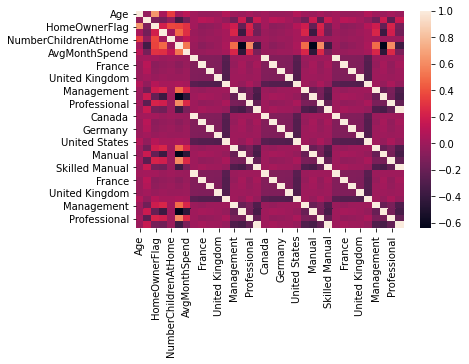

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

covar_mat=df.corr()
sns.heatmap(covar_mat)
plt.show()